<a href="https://colab.research.google.com/github/tnqkrghd/NLP/blob/main/Week2_Where_in_the_Genome_Does_DNA_Replication_Begin%3F_(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.1 The Simplest Way to Replicate DNA

< 참고 자료 >

* DNA Replication Rap
  - https://www.youtube.com/watch?v=1L8Xb6j7A4w
* DNA replication - 3D
  - https://www.youtube.com/watch?v=TNKWgcFPHqw

* The two complementary DNA strands running in opposite directions around a circular chromosome unravel, starting at ori. 

* As the strands unwind, they create two **replication forks**, which expand in both directions around the chromosome until the strands completely separate at the replication terminus (denoted ter). 

* The **replication terminus** is located roughly opposite to ori in the chromosome.

  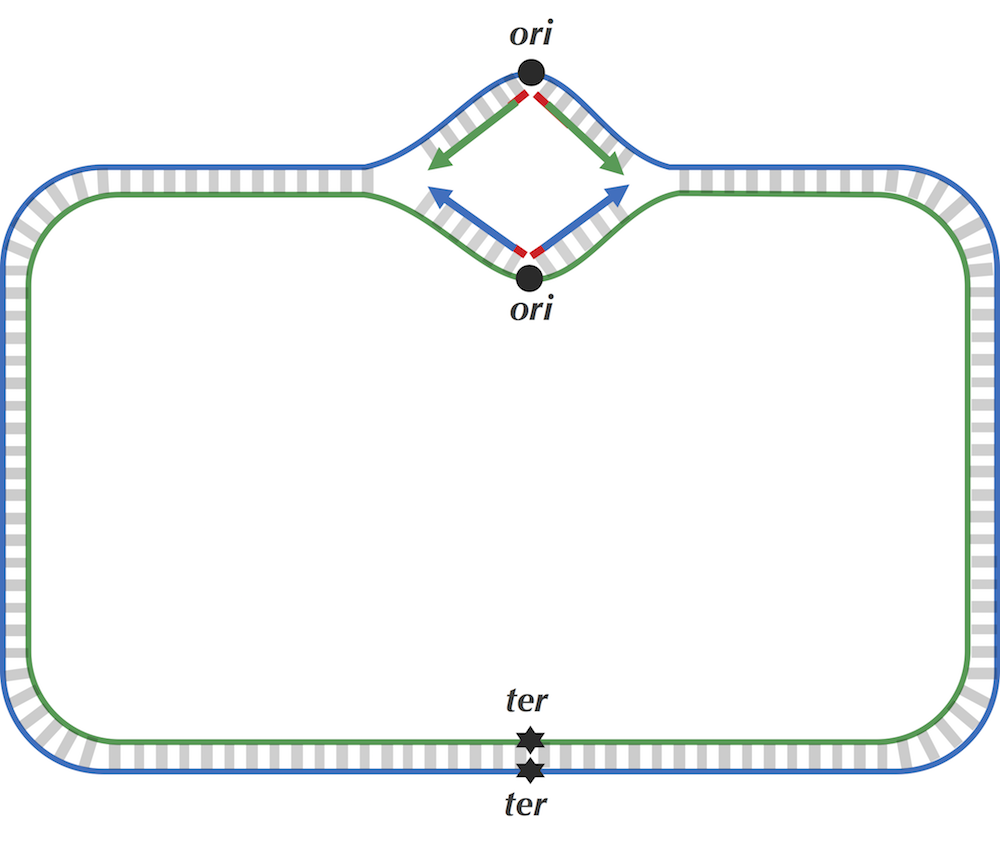

* a DNA polymerase does not wait for the two parent strands to completely separate before initiating replication; instead, it starts copying while the strands are unraveling. Thus, just four DNA polymerases (each responsible for one half-strand) can all start at ori and replicate the entire chromosome.

* To start replication, a DNA polymerase needs a **primer**, a very short complementary segment (shown in red in the figure below) that binds to the parent strand and jump starts the DNA polymerase. 

* After the strands start separating, each of the four DNA polymerases starts replication by adding nucleotides, beginning with the primer and proceeding around the chromosome from ori to ter in either the clockwise or counterclockwise direction. 

* When all four DNA polymerases have reached ter, the chromosome’s DNA will have been completely replicated, resulting in two pairs of complementary strands (figure below), and the cell is ready to divide.

  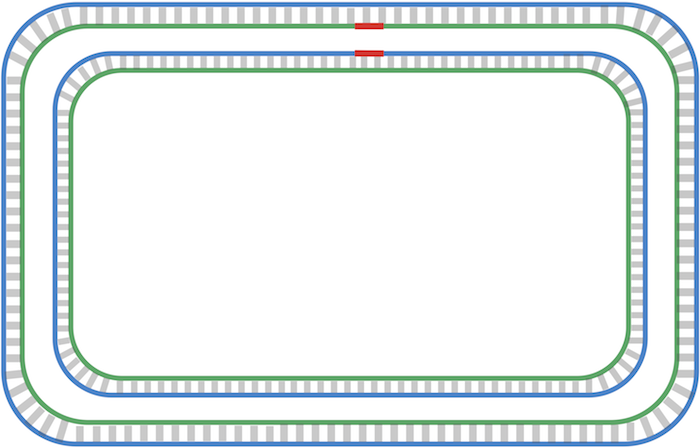

* The problem with our current description is that it assumes that DNA polymerases can copy DNA in either direction along a strand of DNA (i.e., both 5' → 3' and 3' → 5'). 

* However, nature has not yet equipped DNA polymerases with this ability, as they are **unidirectional**, meaning that they can only traverse a template strand of DNA in the 3' → 5' direction.

* There are four different half-strands of parent DNA connecting ori to ter, as highlighted in the figure below. 

* Two of these half-strands are traversed from ori to ter in the 5' → 3' direction and are thus called forward half-strands (represented by thin blue and green lines in the figure below). 

* The other two half-strands are traversed from ori to ter in the 3' → 5' direction and are thus called reverse half-strands (represented by thick blue and green lines in the figure below).

  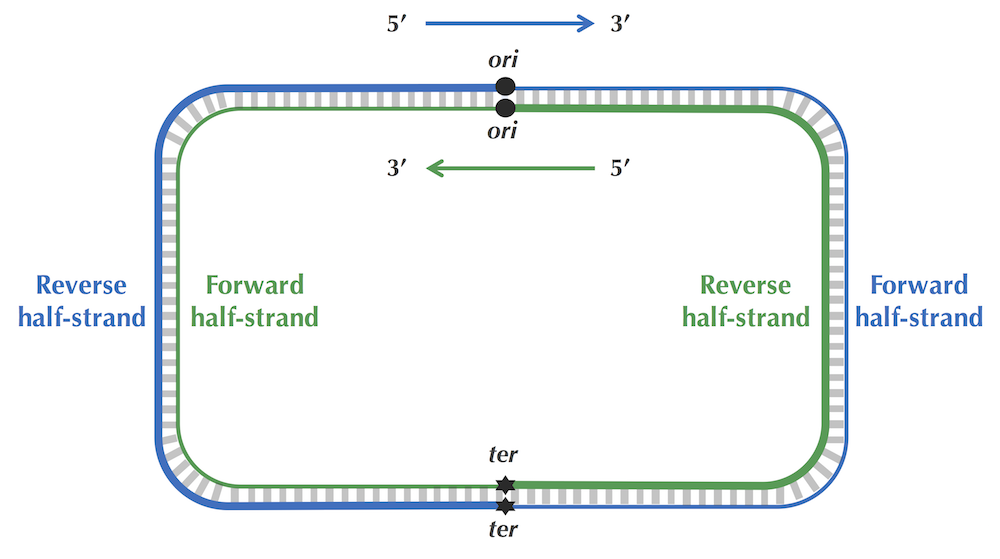

### 1.2 Asymmetry of Replication

< 참고 자료 > 

  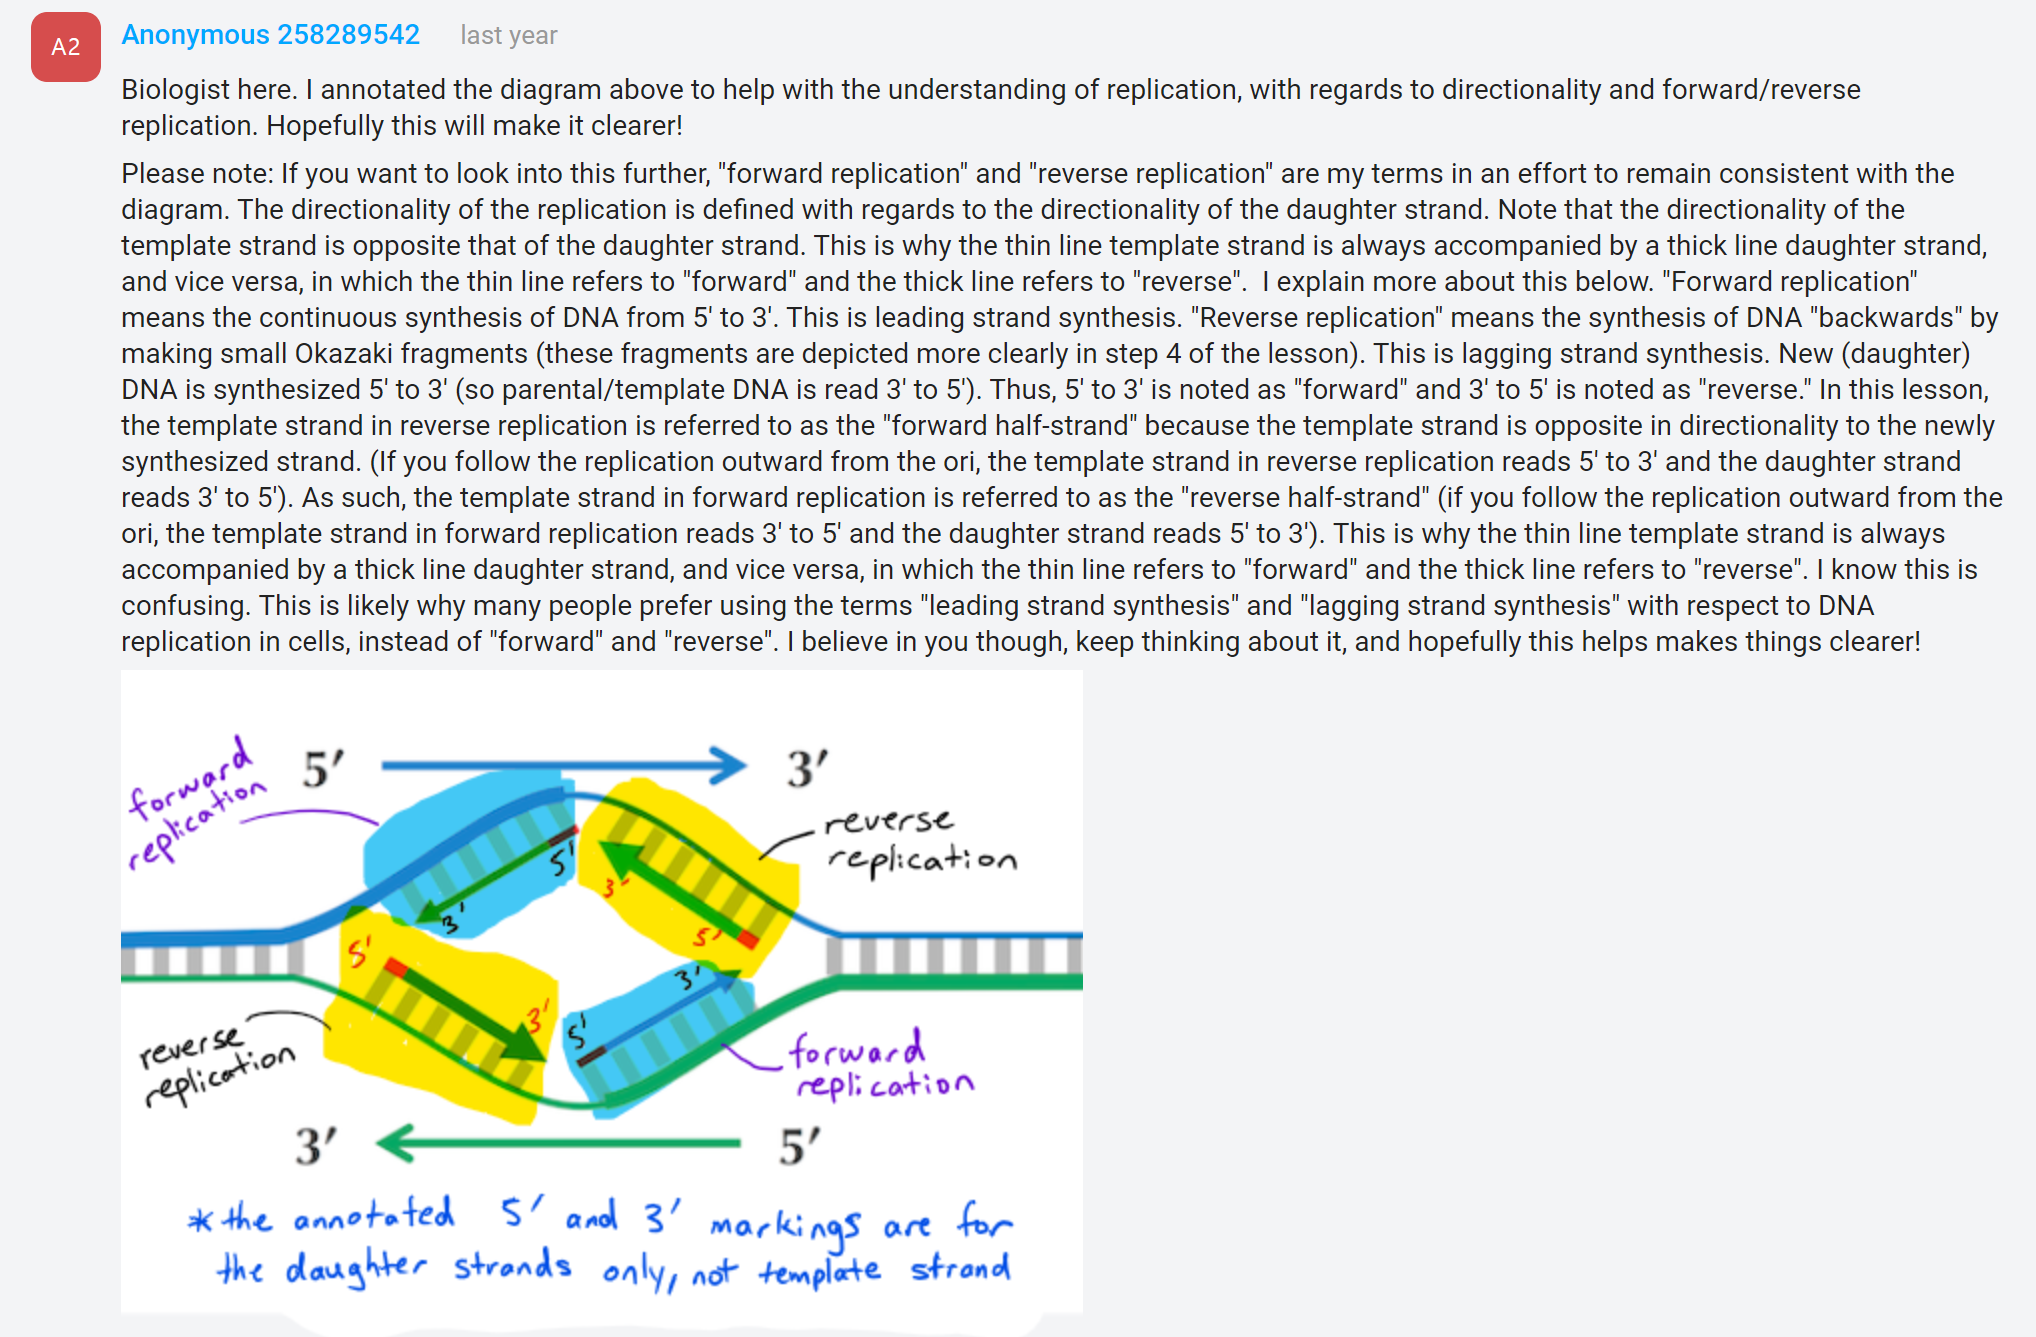

* Since a DNA polymerase can only move in the reverse (3' → 5') direction, it can copy nucleotides non-stop from ori to ter along reverse half-strands. However, replication on forward half-strands is very different because a DNA polymerase cannot move in the forward (5' → 3') direction; on these half-strands, a DNA polymerase must replicate backwards toward ori.

* On a forward half-strand, in order to replicate DNA, a DNA polymerase must wait for the replication fork to open a little (approximately 2,000 nucleotides) until a new primer is formed at the end of the replication fork; afterwards, the DNA polymerase starts replicating a small chunk of DNA starting from this primer and moving backward in the direction of ori.

  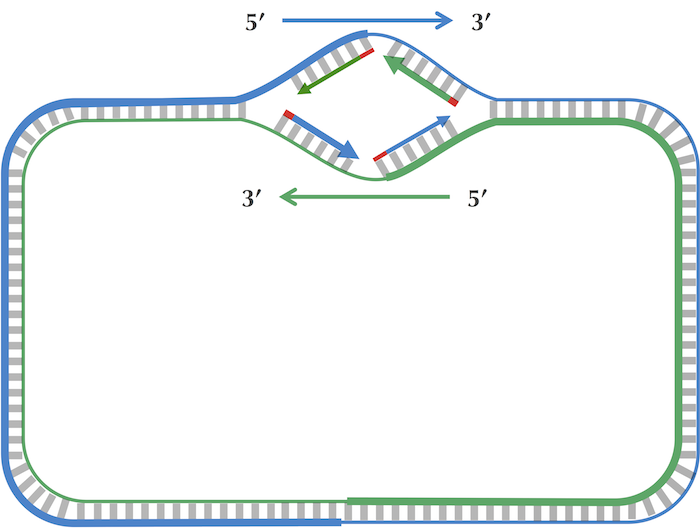


* Replication on a forward half-strand requires occasional stopping and restarting, which results in the synthesis of short Okazaki fragments that are complementary to intervals on the forward half-strand.

  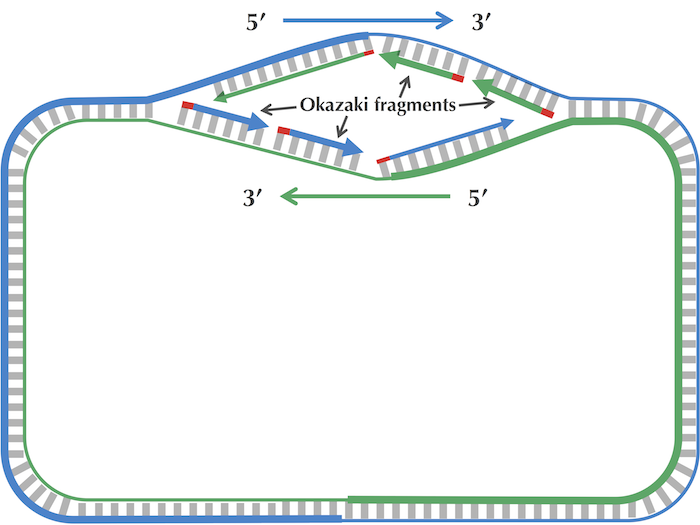

* When the replication fork reaches ter, the replication process is almost complete, but gaps still remain between the disconnected Okazaki fragments, as shown in the figure below.

  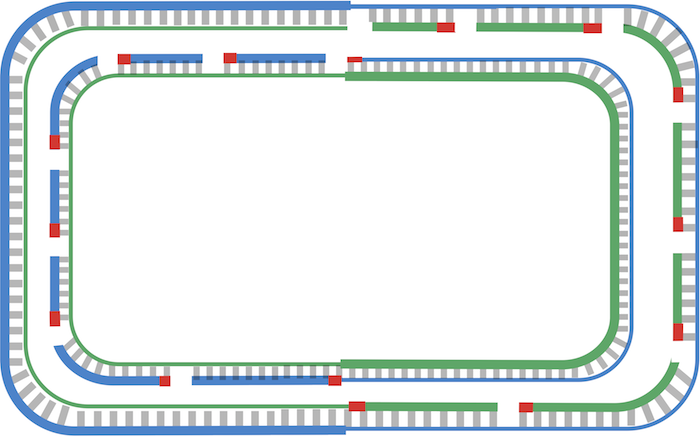


* Finally, consecutive Okazaki fragments must be sewn together by an enzyme called DNA ligase, resulting in two intact daughter chromosomes, each consisting of one parent strand and one newly synthesized daughter strand, as shown in the figure below.

  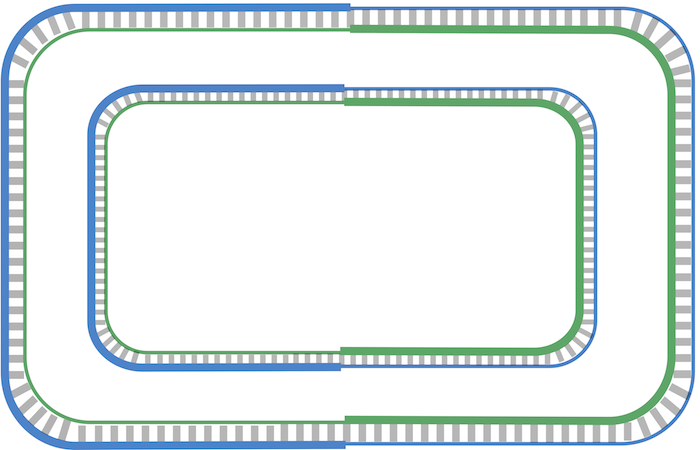  

### 1.3 Peculiar Statistics of the Forward and Reverse Half-Strands

< Deamination >

* We will explore the asymmetry of DNA replication to design a new algorithm for finding ori.

* Since the replication of a reverse half-strand proceeds quickly, it lives double-stranded for most of its life. Conversely, a forward half-strand spends a much larger amount of its life single-stranded, waiting to be used as a template for replication.

* This discrepancy between the forward and reverse half-strands is important because single-stranded DNA has a much higher mutation rate than double-stranded DNA. In particular, if one of the four nucleotides in single-stranded DNA has a greater tendency than other nucleotides to mutate in single-stranded DNA, then we should observe a shortage of this nucleotide on the forward half-strand.

* Let’s compare the nucleotide counts of the reverse and forward half-strands. If these counts differ substantially, then we will design an algorithm that attempts to track down these differences in genomes for which ori is unknown.

  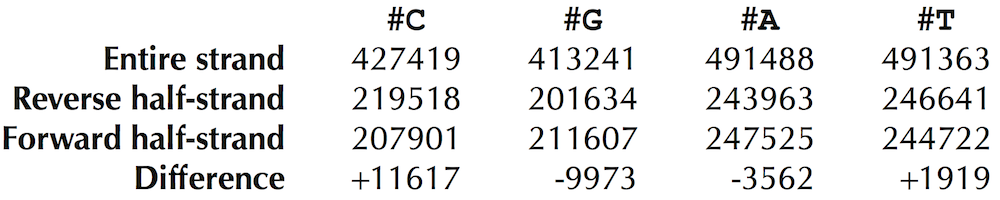



* Although the frequencies of A and T are practically identical on the two half-strands, C is more frequent on the reverse half-strand than on the forward half-strand, resulting in a difference of 219518 - 207901 = +11617. Its complementary nucleotide G is less frequent on the reverse half-strand than on the forward half-strand, resulting in a difference of 201634 - 211607 = -9973.

* Let’s see if we can take advantage of these peculiar statistics caused by deamination to locate ori in a circular bacterial genome.

* Our hope is that the window having the fewest occurrences of C will roughly correspond to the forward half-strand and that the window having the most occurrences of C will roughly correspond to the reverse half-strand. And if we know where the forward and reverse half-strands are, then we have found ori!

< Analyzing a genome’s half-strands >

* Although most bacteria have circular genomes, we have thus far assumed that genomes were linear, a reasonable simplifying assumption because the length of the window is much shorter than the length of the genome.

* We will define a string ExtendedGenome as Genome+Genome[0:n//2]. That is, we copy the first len(Genome)//2 nucleotides of Genome to the end of the string.

  - ex) CTGCTTCGCCCGCCGGACCGGCCTCGTGATGGGGT**CTGCTTCGCCCGCCGGA**


* We will keep track of the total number of occurrences of C that we encounter in each window of ExtendedGenome by using a symbol array. The i-th element of the symbol array is equal to the number of occurrences of the symbol in the window of length len(Genome)//2 starting at position i of ExtendedGenome.

  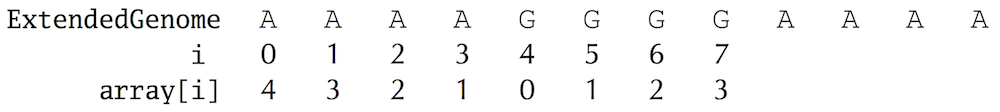

  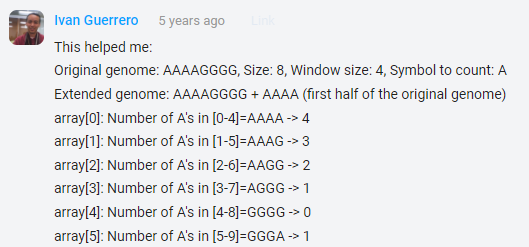

In [ ]:
def PatternCount(Pattern, Text):
    count = 0
    for i in range(len(Text) - len(Pattern) + 1):
      if Text[i:i+len(Pattern)] == Pattern:
        count += 1
    return count

def SymbolArray(Genome, symbol):
    array = {}
    n = len(Genome)
    ExtendedGenome = Genome + Genome[0:n//2]
    for i in range(n):
        array[i] = PatternCount(symbol, ExtendedGenome[i:i+(n//2)])
    return array

In [ ]:
SymbolArray('AAAAGGGG', 'A')

{0: 4, 1: 3, 2: 2, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3}

* Try running SymbolArray on your own computer with Genome equal to the E. coli genome and symbol equal to "C". What happens? Why?

* If you attempted the previous exercise, then you may have wondered why the time limit was exceeded. The reason why is that SymbolArray is very slow. Although computer speed has increased dramatically, even the fastest computer in the world cannot execute a program based on an inefficient algorithm.

  - O(n^2)


< From an inefficient to an efficient algorithm >

* To compute PatternCount(symbol, ExtendedGenome[0:n//2]), the algorithm consults n//2 positions of ExtendedGenome, starting at position 0. It then returns all the way back to position 1 of ExtendedGenome to compute PatternCount(symbol, ExtendedGenome[1:1+(n//2)], symbol), which consults positions 1 through 1+(n//2) of ExtendedGenome.

* Can we generate a symbol array using only one pass down ExtendedGenome and therefore only n+(n//2) total symbol comparisons?

* To speed up SymbolArray, we observe that when we slide a window one symbol to the right, the number of occurrences of symbol in the window does not change much, and so regenerating the entire array from scratch is inefficient.

* We only need to consider two symbols each time we slide the window.

In [ ]:
def FasterSymbolArray(Genome, symbol):
  array = {}
  n = len(Genome)
  ExtendedGenome = Genome + Genome[0:n//2]

  array[0] = PatternCount(symbol, Genome[0:n//2])
  
  for i in range(1, n):
    array[i] = array[i-1]
    if ExtendedGenome[i-1] == symbol:
      array[i] -= 1
    if ExtendedGenome[i+(n//2)-1] == symbol:
      array[i] += 1
      
  return array

< Finding ori >

* The figure below visualizes the symbol array for E. coli and symbol equal to "C". Notice the clear pattern in the data! 

* The maximum value of the array occurs around position 1600000, and the minimum value of the array occurs around position 4000000. We can therefore infer that the reverse half-strand begins around position 1600000, and that the forward half-strand begins around position 4000000. 

* Because we know that ori occurs where the reverse half-strand transitions to the forward half-strand, we have discovered that ori is located in the neighborhood of position 4000000 of the E. coli genome, without ever needing to put on a lab coat!

  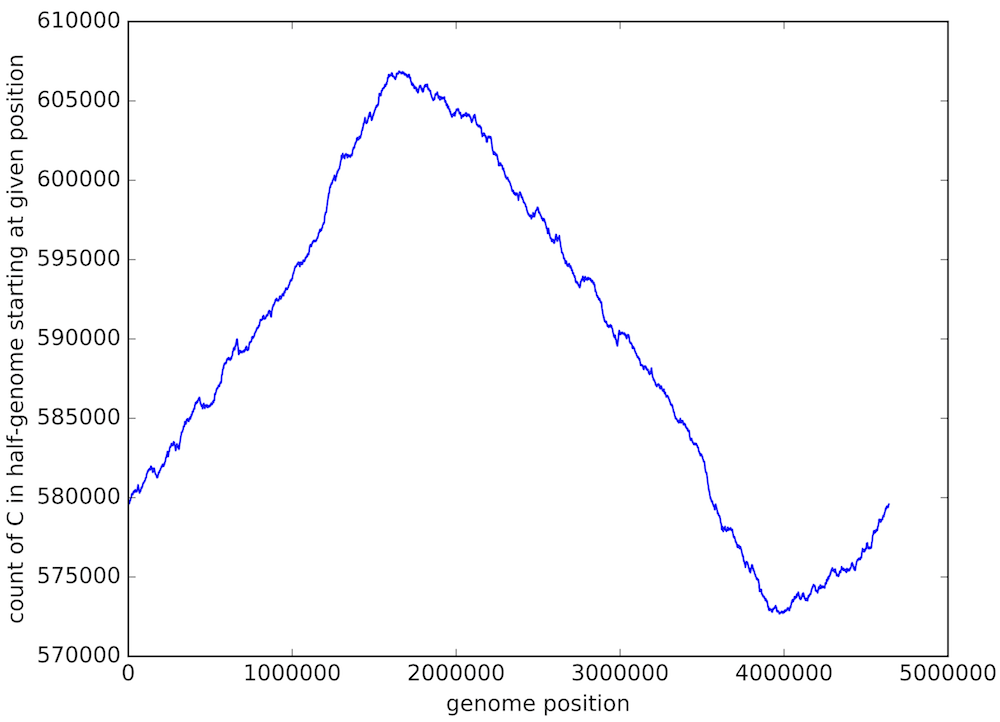


### 1.4 The Skew Diagram

* In the table containing nucleotide counts for T. petrophila (reproduced below), we noted that not just C but also G has peculiar statistics on the forward and reverse half-strands.

  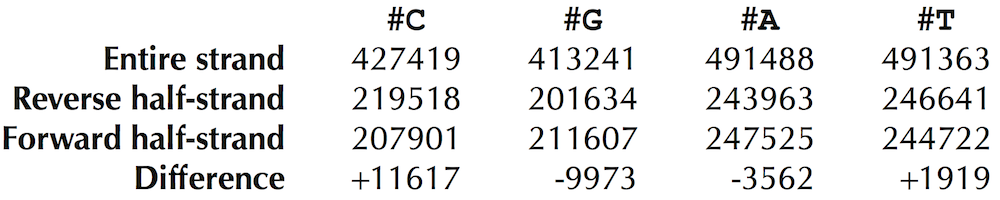

* Thus, our idea is to traverse the genome, keeping a running total of the difference between the counts of G and C. If this difference starts increasing, then we guess that we are on the forward half-strand; on the other hand, if this difference starts decreasing, then we guess that we are on the reverse half-strand (see figure below).

  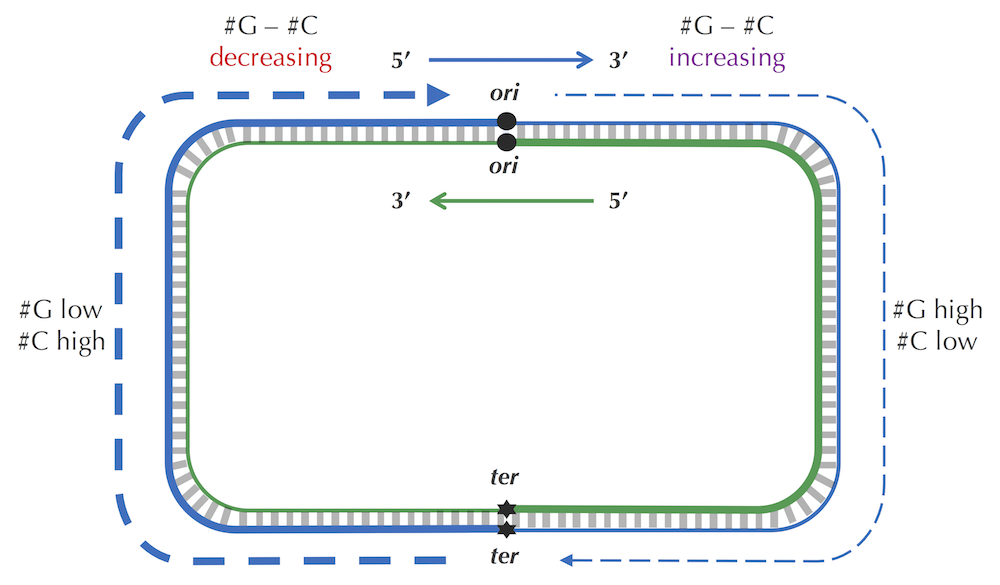

* We will keep track of the difference between the total number of occurrences of G and the total number of occurrences of C that we have encountered so far in Genome by using a **skew array**.

  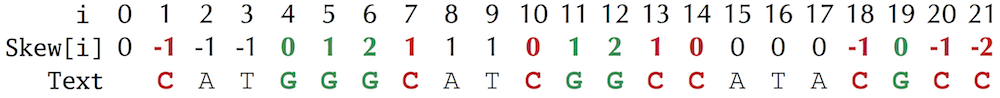

In [ ]:
def SkewArray(Genome):
   Skew = [0]
   n = len(Genome)

   for i in range(n):
     if Genome[i] == "G":
       Skew.append(Skew[i]+1)
     elif Genome[i] == "C":
       Skew.append(Skew[i]-1)
     else:
       Skew.append(Skew[i])
    
   return Skew

In [ ]:
# another version

def SkewArray(Genome):
    skew = [0]
    score = {"A":0, "T":0, "C":-1, "G":1}
    for i in range(1,len(Genome)+1):
            skew.append(score[Genome[i-1]] + skew[i-1])
    return skew

In [ ]:
SkewArray("CATGGGCATCGGCCATACGCC")

[0, -1, -1, -1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, -1, 0, -1, -2]

* The skew diagram of Genome is defined by plotting i against Skew[i] as i ranges from 0 to len(Genome). The figure below shows the skew diagram for the genome from the previous step.

  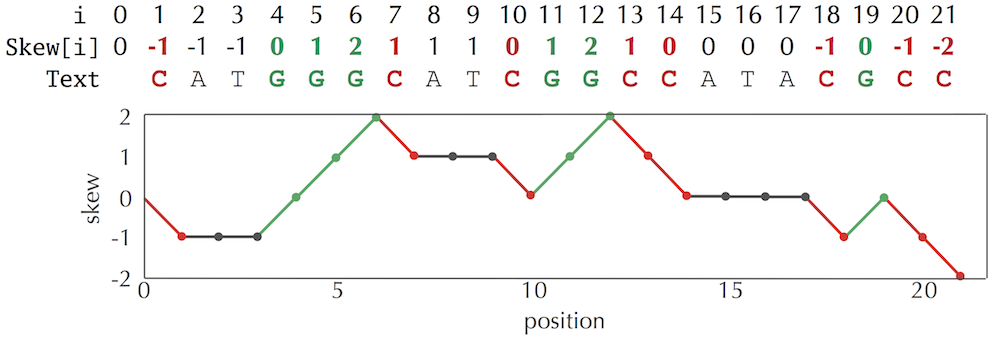


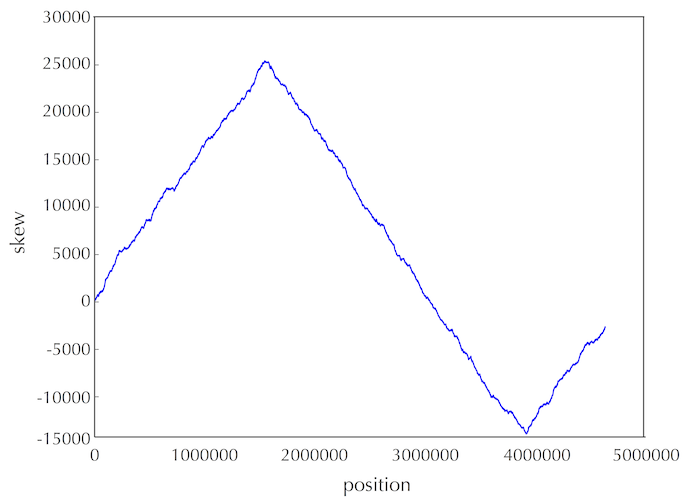

* After looking at the E. coli skew diagram (reproduced below), where do you think that ori is located in E. coli?

* Let’s follow the 5' → 3' direction of DNA and walk along the chromosome from ter to ori (along a reverse half-strand), then continue on from ori to ter (along a forward half-strand). In the figure below, we see that the skew is decreasing along the reverse half-strand and increasing along the forward half-strand. 

* Thus, the skew should achieve a minimum at the position where the reverse half-strand ends and the forward half-strand begins, which is exactly the location of ori!

  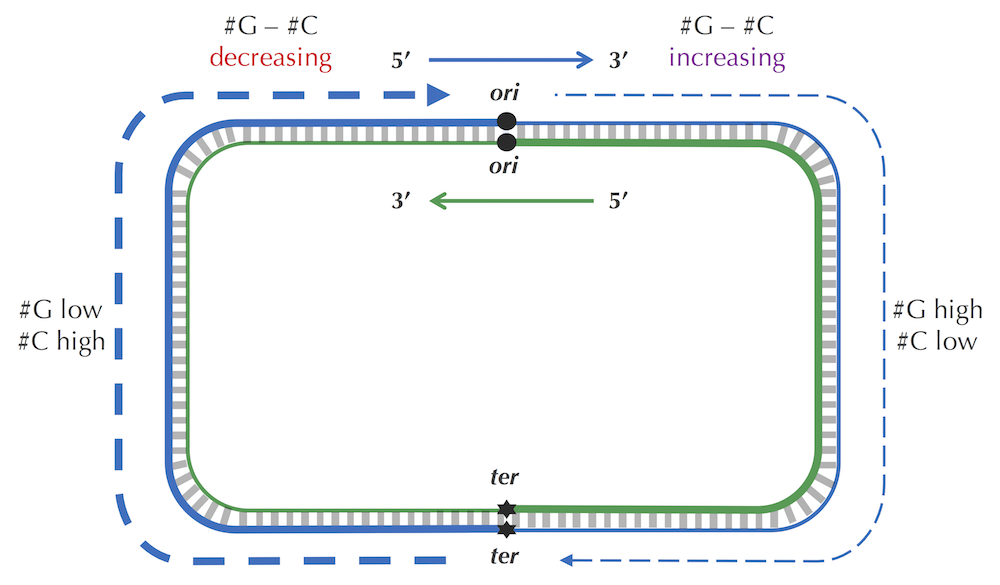

* Minimum Skew Problem: Find a position in a genome where the skew diagram attains a minimum.
  - Input: A DNA string Genome.
  - Output: All integer(s) i minimizing Skew[i] among all values of i (from 0 to len(Genome)).

In [ ]:
def MinimumSkew(Genome):

  positions = []
  skew = SkewArray(Genome)
  val = min(skew)

  for i in range(len(skew)):
    if val == skew[i]:
      positions.append(i)
  
  return positions

In [ ]:
# another version

def MinimumSkew(Genome):
    all_positions = SkewArray(Genome)
    positions = [i for i, e in enumerate(all_positions) if e == min(all_positions)]
    return positions

In [ ]:
sample = "TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT"

MinimumSkew(sample)

[11, 24]

* Note that the skew diagram (reproduced below for E. coli) changes depending on where we start our walk along the circular chromosome. Does the minimum of the skew diagram point to the same genomic location regardless of where we begin walking to generate the skew diagram?

  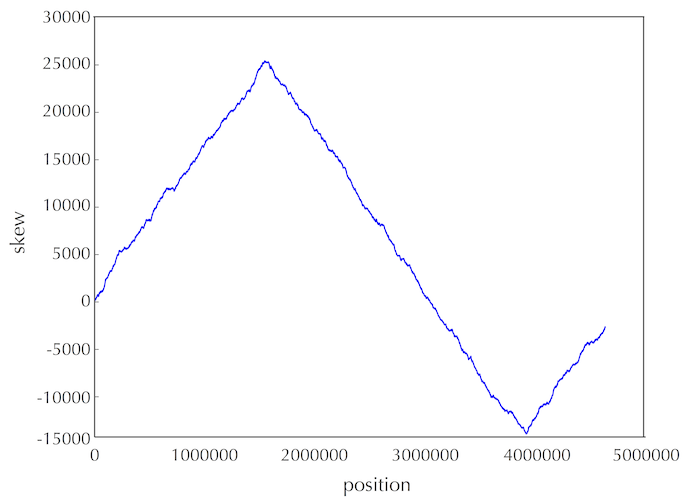


### 1.5 Some Hidden Messages Are More Elusive than Others

* Solving the Frequent Words Problem in a window of length 500 starting at position 3923620 (shown below) reveals no 9-mers (along with their reverse complements) that appear three or more times! 

* Even if we have located the position of ori in E. coli, it appears that we still have not found the DnaA boxes that jump-start replication in this bacterium.

* Before we give up, let’s examine the ori of Vibrio cholerae one more time to see if it provides us with any insights on how to alter our algorithm to find DnaA boxes in E. coli.

* You may have noticed that in addition to the three occurrences of ATGATCAAG and three occurrences of its reverse complement CTTGATCAT, the Vibrio cholerae ori contains additional occurrences of ATGATCAA**C** and CATGATCA**T**, which differ from ATGATCAAG and CTTGATCAT in only a single nucleotide:

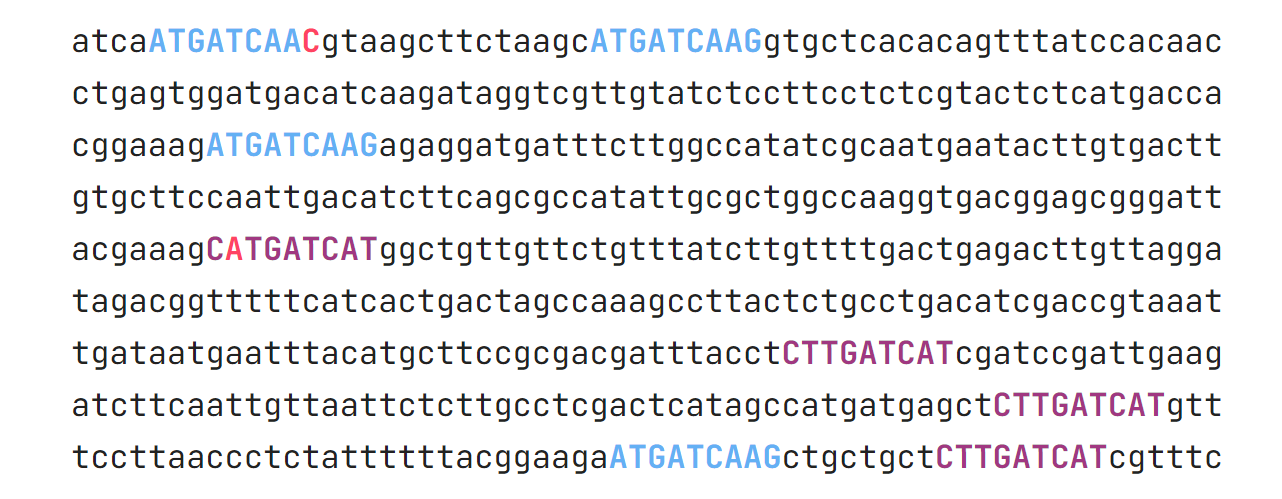

* Finding eight approximate occurrences of our target 9-mer and its reverse complement in a short region is even more statistically surprising than finding the six exact occurrences of ATGATCAAG and its reverse complement CTTGATCAT that we stumbled upon in the beginning of our investigation.

* Furthermore, the discovery of these approximate 9-mers makes sense biologically, since DnaA can bind not only to “perfect” DnaA boxes but to their slight modifications as well.

* Hamming Distance Problem: Compute the Hamming distance between two strings.
  - Input: Two strings of equal length.
  - Output: The Hamming distance between these strings.

In [1]:
# Input:  Two strings p and q
# Output: An integer value representing the Hamming Distance between p and q.

def HammingDistance(p, q):
    # your code here
    count = 0
    for i in range(len(p)):
      if p[i] != q[i]:
        count += 1
      i += 1

    return count

In [2]:
p = 'GGGCCGTTGGT'
q = 'GGACCGTTGAC'

HammingDistance(p, q)

3

* We say that a k-mer Pattern appears as a substring of Text with at most d mismatches if there is some k-mer substring Pattern' of Text having d or fewer mismatches with Pattern; that is, HammingDistance(Pattern, Pattern') ≤ d.

* Approximate Pattern Matching Problem: Find all approximate occurrences of a pattern in a string.
  - Input: Strings Pattern and Text along with an integer d.
  - Output: All starting positions where Pattern appears as a substring of Text with at most d mismatches.

In [13]:
# Input:  Strings Pattern and Text along with an integer d
# Output: A list containing all starting positions where Pattern appears
# as a substring of Text with at most d mismatches
def ApproximatePatternMatching(Text, Pattern, d):
    positions = [] # initializing list of positions
    # your code here
    for i in range(len(Text)-len(Pattern)+1):
      text = Text[i:i+len(Pattern)]
      dist = HammingDistance(text, Pattern)
      if dist <= d:
        positions.append(i)
        print('Matched :', text)
        print('Hamming Dist:', dist)
      i += 1
    return positions

In [14]:
text = "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
pat = 'ATTCTGGA'

ApproximatePatternMatching(text, pat, 3)

Matched : AATCCAGA
Hamming Dist: 3
Matched : ATCCAGAA
Hamming Dist: 3
Matched : ATTTCGGG
Hamming Dist: 3
Matched : TTTCGGGA
Hamming Dist: 2


[6, 7, 26, 27]

* Given input strings Text and Pattern as well as an integer d, we extend the definition of PatternCount to the function ApproximatePatternCount(Pattern, Text, d). This function computes the number of occurrences of Pattern in Text with at most d mismatches. 

* For example,
  - ApproximatePatternCount(AAAAA, AACAAGCATAAACATTAAAGAG, 1) = 4
  - because AAAAA appears four times in this string with at most one mismatch: AACAA, ATAAA, AAACA, and AAAGA. Notice that two of these occurrences overlap.

In [15]:
# Input:  Strings Pattern and Text, and an integer d
# Output: The number of times Pattern appears in Text with at most d mismatches
def ApproximatePatternCount(Pattern, Text, d):
    count = 0 # initialize count variable
    # your code here
    for i in range(len(Text)-len(Pattern)+1):
      text = Text[i:i+len(Pattern)]
      dist = HammingDistance(text, Pattern)
      if dist <= d:
        count += 1
      i += 1
    return count

In [16]:
text = "TTTAGAGCCTTCAGAGG"
pat = "GAGG"
d = 2

ApproximatePatternCount(pat, text, d)

4

### 1.6 A Final Attemp at Finding DNAa Boxes in E. coli

* Although the minimum of the skew diagram for E. coli is found at position 3923620, we should not assume that its ori is found exactly at this position due to random fluctuations in the skew.

* To remedy this issue, we could choose a larger window size (e.g., 1000), but expanding the window introduces the risk that we may bring in other clumped 9-mers that do not represent DnaA boxes but appear in this window more often than the true DnaA box. It makes more sense to try a small window either starting, ending, or centered at the position of minimum skew.

* Let’s cross our fingers and identify the most frequent 9-mers (with 1 mismatch) within a window of length 500 starting at position 3923620 of the E. coli genome. Bingo! The experimentally confirmed DnaA box in E. coli (TTATCCACA) is indeed a most frequent 9-mer, along with its reverse complement TGTGGATAA (with 1 mismatch):

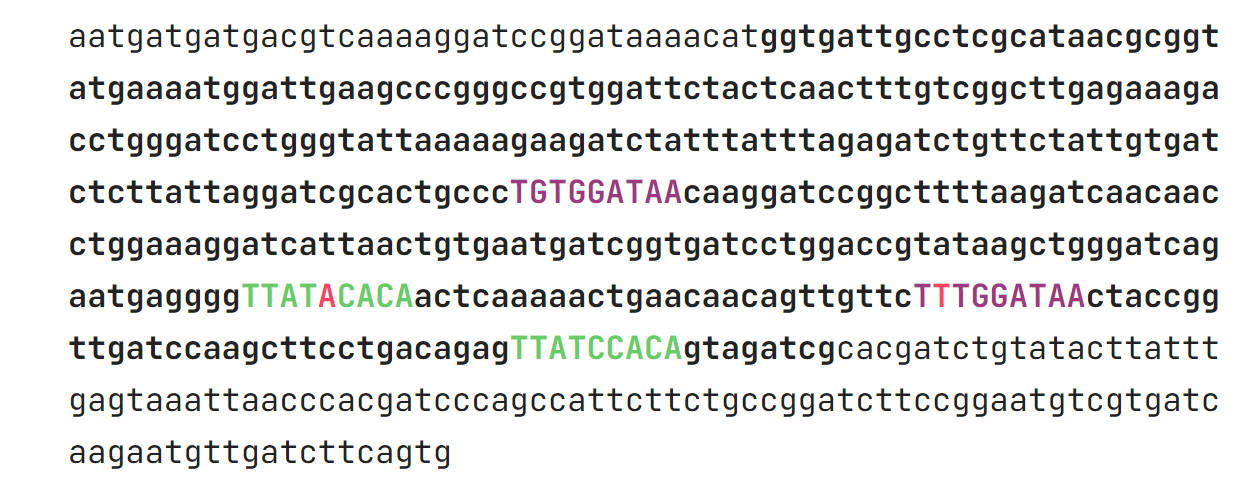

* You will notice that we highlighted an interior interval of this sequence with darker text. This region is the experimentally verified ori of E. coli, which starts 37 nucleotides after position 3923620, where the skew reaches its minimum value.

* We were very fortunate that the DnaA boxes of E. coli are captured in the window that we chose. Moreover, while TTATCCACA represents a most frequent 9-mer in this 500-nucleotide window, it is not the only one: GGATCCTGG, GATCCCAGC, GTTATCCAC, AGCTGGGAT, and CTGGGATCA (along with their reverse complements) also appear four times with 1 mismatch.

* In this chapter, every time we find ori, we seem to find some other surprisingly frequent 9-mers. Why do you think this is?

* We do not know what purpose — if any — these other 9-mers serve in the E. coli genome, but we do know that there are many different types of hidden messages in genomes; these hidden messages have a tendency to cluster within a genome, and most of them have nothing to do with replication. 

* The important lesson is that existing approaches to ori prediction remain imperfect and sometimes inconclusive. However, even providing biologists with a small collection of 9-mers as candidate DnaA boxes is a great aid as long as one of these 9-mers is correct.

* Thus, the moral of this chapter is that even though computational analysis can be powerful, bioinformaticians should collaborate with biologists to verify their predictions. 

### 1.7 Detour: Big-O Notation

* Computer scientists typically measure an algorithm’s efficiency in terms of its worst-case running time, which is the largest amount of time an algorithm can take for the most difficult input of a given size. The advantage to considering the worst case running time is that we are guaranteed that our algorithm will never behave worse than our worst-case estimate.

* Big-O notation compactly describes the running time of an algorithm. For example, if your algorithm for sorting an array of n numbers takes roughly n2 operations for the most difficult dataset, then we say that the running time of your algorithm is O(n2).

* Formally, a function f(n) is Big-O of function g(n), or O(g(n)), when f(n) ≤ c · g(n) for some constant c and sufficiently large n.